<a href="https://colab.research.google.com/github/tvr430/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/netflix-rotten-tomatoes-metacritic-imdb.csv')

df.drop(['Image', 'Poster', 'TMDb Trailer','Trailer Site','Netflix Link', 'IMDb Link'],axis=1,inplace=True)
df['Boxoffice']=df['Boxoffice'].replace('[$,]','',regex = True).astype(float)
df['Boxoffice']=df['Boxoffice'].fillna(0)
df['Release Date']=pd.to_datetime(df['Release Date'])
df['Netflix Release Date']=pd.to_datetime(df['Netflix Release Date'])

dfm=df[df['Series or Movie']=='Movie'].reset_index(drop=True)
dfs=df[df['Series or Movie']=='Series'].reset_index(drop=True)

score=[col for col in df if 'Score' in col]
score.extend(['Title','Boxoffice'])
df_score=df[score].reset_index(drop=True)
df_score=df_score.sort_values(['Boxoffice'],ascending=False)
df_score=df_score.reset_index(drop=True)

dfdate=df[['Title','Boxoffice','Release Date','Netflix Release Date']]
dfdate['rdd']=dfdate['Netflix Release Date']-dfdate['Release Date']
dfdate=dfdate.sort_values('rdd').reset_index(drop=True)

dfd=df[['Director','Boxoffice']].groupby(['Director']).sum('Boxoffice')
dfd=dfd.sort_values('Boxoffice',ascending=False).reset_index(drop=True)

df_na_bo=df[df['Boxoffice']>0].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
def cc(col,a=10,b=False):
#     this function takes a column as input and outputs a bargraph that gives the count of top 10 occurances
    col=col.dropna()
    l=[]
    for i in col:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d={}
    for i in l:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
    df=pd.DataFrame(d.values(),index=d.keys())
    df=df.sort_values(0, ascending=b)
    x=sns.barplot(x=df.index[0:a],y=df[0][0:a])
    return x

def countgenre(col):
    col=col.dropna()
    l=[]
    for i in col:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d=[]
    for i in l:
        if i not in d:
            d.append(i)
    return d

def split_n_aggr(df,feature_to_group,common_feature,entries_to_omit):
    l=[]
    for i in feature_to_group:
        if type(i)==str:
            l.extend(i.replace(' ','').split(','))
    d=[]
    for i in l:
        if (i not in d)&(i not in entries_to_omit):
            d.append(i)
    collection={}
    for j in d:
        sum1=0
        for i in range(len(df)):
            if type(feature_to_group[i])==str:
                if j in feature_to_group[i]:
                    sum1=sum1+common_feature[i]
        collection[j]=sum1
    return collection

def split_n_aggr2(df,feature_to_group,common_feature,entries_to_omit):
    l=[]
    for j in feature_to_group:
        e=[]
        if type(j)==str:
            e.extend(j.replace(' ','').split(','))
        l.extend(e)
    collection={}
    for j in l:
        sum1=0   
        for i in range(len(df)):
            m=[]
            if type(feature_to_group[i])==str:
                m.extend(feature_to_group[i].replace(' ','').split(','))
                for q in m:
                    if j==q:
                        sum1=sum1+common_feature[i]
        collection[j]=sum1
    return collection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


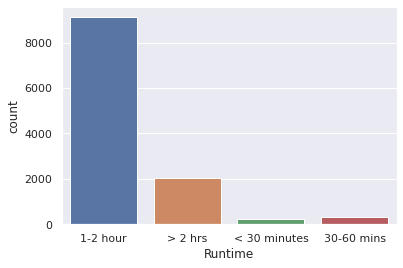

In [ ]:
sns.countplot(dfm['Runtime'])

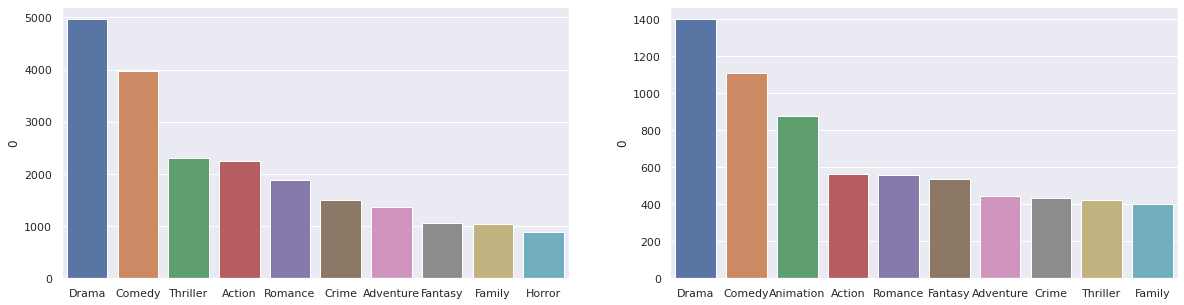

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plt.subplot(1,2,1)
cc(dfm.Genre)
plt.subplot(1,2,2)
cc(dfs.Genre)

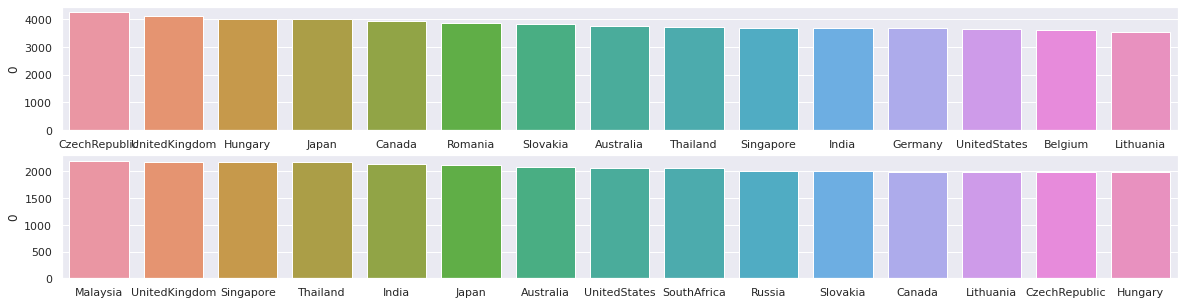

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plt.subplot(2,1,1)
cc(dfm['Country Availability'],15)
plt.subplot(2,1,2)
cc(dfs['Country Availability'],15)

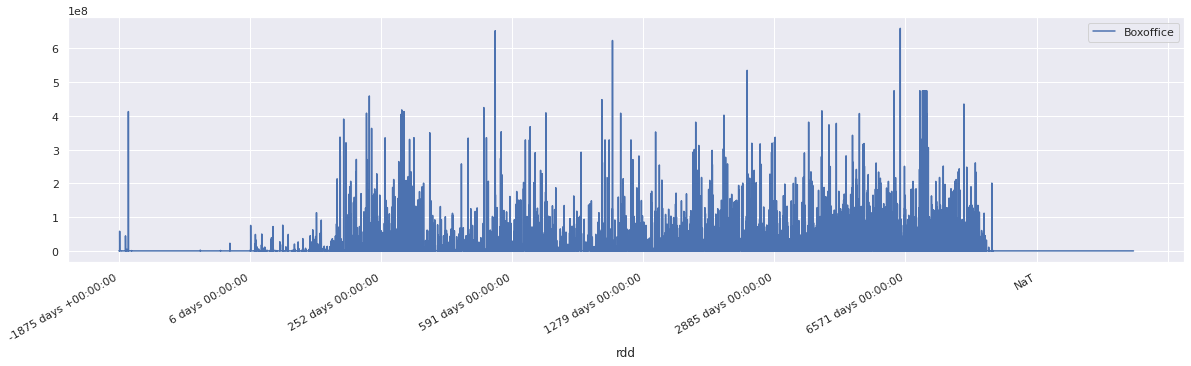

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
dfdate.plot(x='rdd',y='Boxoffice')

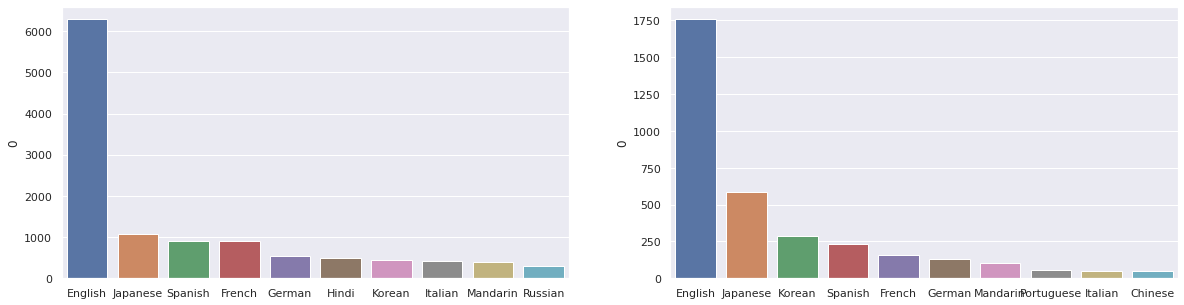

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
plt.subplot(1,2,1)
cc(dfm['Languages'])
plt.subplot(1,2,2)
cc(dfs['Languages'])

### Best performing Directors of all time and all genres by boxoffice collection

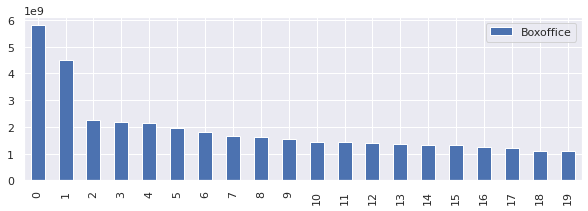

In [ ]:
sns.set(rc={'figure.figsize':(10,3)})
dfd[0:20].plot(kind='bar')

### Most Popular tags

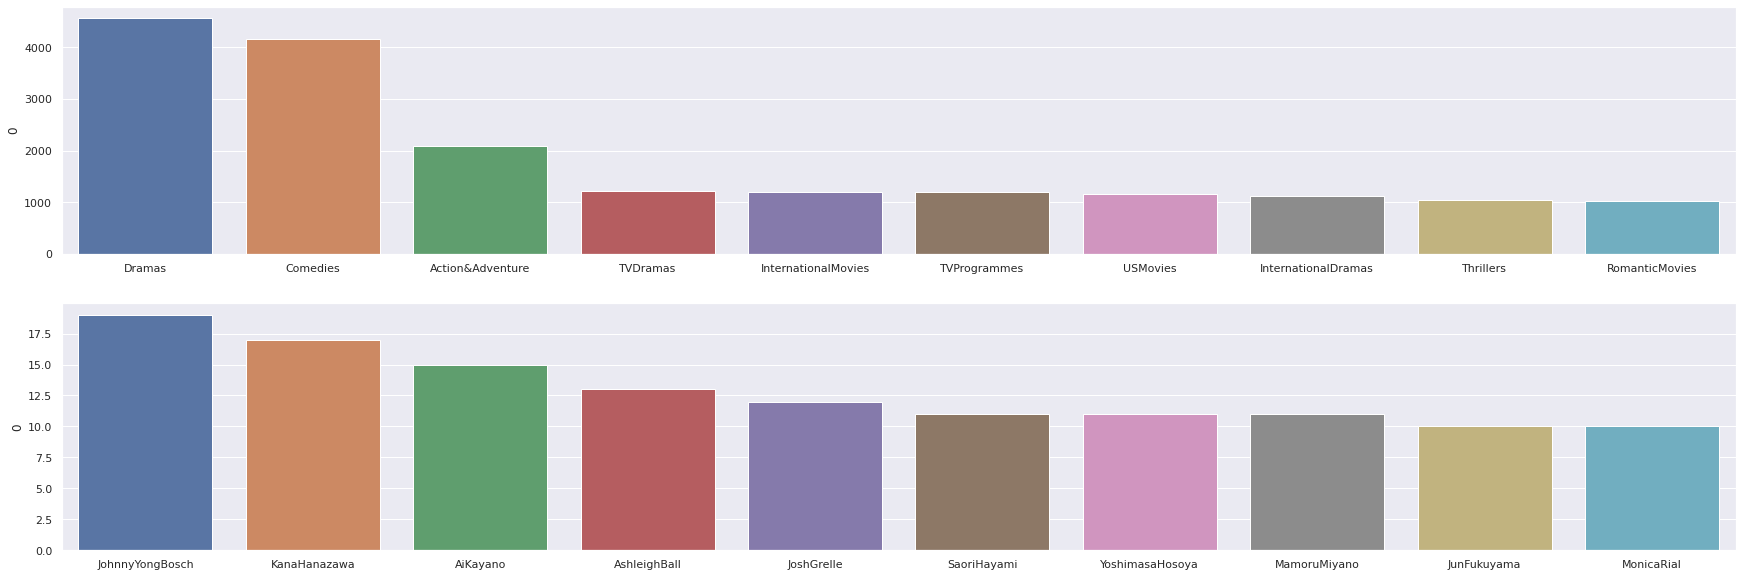

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
plt.subplot(2,1,1)
cc(df['Tags'],10)
plt.subplot(2,1,2)
cc(dfs['Actors'],10)

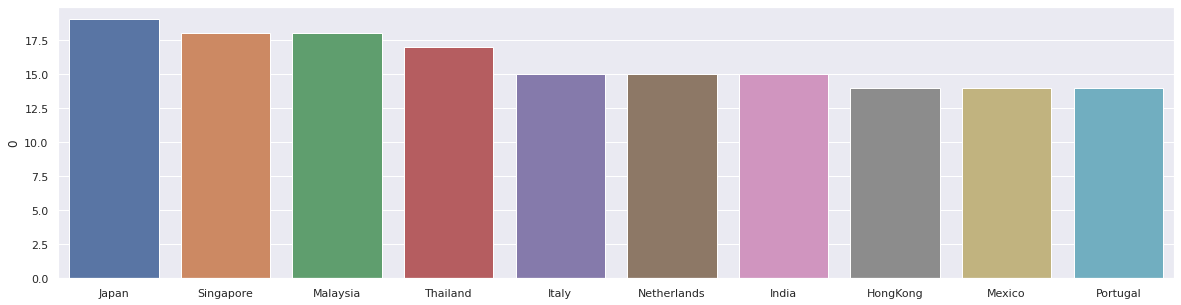

In [ ]:
pl=[]
for i in range(len(df)):
    if type(df.Actors[i])==str:
        if 'Johnny Yong Bosch' in df.Actors[i]:
            pl.append(i)
sns.set(rc={'figure.figsize':(20,5)})
cc(df.iloc[pl]['Country Availability'])

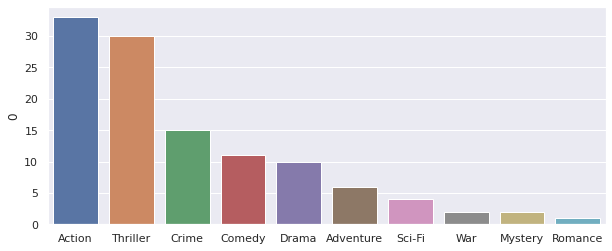

In [ ]:
pl=[]
for i in range(len(dfm)):
    if type(dfm.Actors[i])==str:
        if 'Bruce Willis' in dfm.Actors[i]:
            pl.append(i)
sns.set(rc={'figure.figsize':(10,4)})
cc(dfm.iloc[pl]['Genre'])

In [ ]:
a=df_na_bo['Production House']
b=df_na_bo['Boxoffice']
c=['Film','Ltd.','Inc.','The']
collection1=split_n_aggr(df_na_bo,a,b,c)
dfph=pd.DataFrame(collection1.values(),index=collection1.keys(),columns=['Production House'])
dfph=dfph.sort_values('Production House',ascending=False)
z=15
px.bar(dfph[0:z],x=dfph.index[0:z],y='Production House', text='Production House')

In [ ]:
zz=25
px.pie(dfph[0:zz],names=dfph.index[0:zz],values='Production House')

In [ ]:
a=df_na_bo['Genre']
b=df_na_bo['Boxoffice']
c=[]
c3=split_n_aggr(df_na_bo,a,b,c)
dfgb=pd.DataFrame(c3.values(),index=c3.keys(),columns=['Genre'])
dfgb=dfgb.sort_values('Genre',ascending=False)
z=10
px.bar(dfgb[0:z],x=dfgb.index[0:z],y='Genre', text='Genre')

In [ ]:
a=df_na_bo['Actors']
b=df_na_bo['Boxoffice']
c=[]
c4=split_n_aggr2(df_na_bo,a,b,c)

KeyboardInterrupt: ignored

In [ ]:
dfa=pd.DataFrame(c4.values(),index=c4.keys(),columns=['Actors'])
dfa=dfa.sort_values('Actors',ascending=False)
z=20
px.bar(dfa[0:z],x=dfa.index[0:z],y='Actors', text='Actors')

In [ ]:
df_new1=df_score.dropna(subset='Hidden Gem Score').sort_values('Hidden Gem Score', ascending=False)
df_new1=df_new1.reset_index(drop=True)

In [ ]:
df_new2=df_na_bo[df_na_bo['Series or Movie']=='Movie'].dropna(subset='IMDb Score').reset_index(drop=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(x=df_new2['IMDb Score'],y=df_new2['Boxoffice'])

In [ ]:
df_new3=df_paramount[df_paramount['Series or Movie']=='Movie'].dropna(subset='IMDb Score').reset_index(drop=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(x=df_new3['IMDb Score'],y=df_new3['Boxoffice'])

In [ ]:
df_new4=df.dropna(subset=['Director','IMDb Score'])
df_new5=df_new4[['Director','IMDb Score']].groupby('Director').agg(['mean','count']).sort_values(by=[('IMDb Score', 'mean')], ascending=False)

In [ ]:
df_new5[df_new5[('IMDb Score', 'count')]>3].head(10)

In [ ]:
df_new5[0:25].plot(kind='bar')